# Scratch File for Giles. No one else should edit or check in.

In [334]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import shared_utils as su
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as ply

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [254]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None  # default='warn'

In [81]:
df = su.read_trip_data()
df.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069


In [242]:
df.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,2015-08-31 23:22:00,Embarcadero at Sansome,60,487,Customer,9069


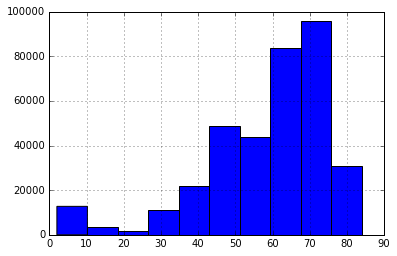

In [110]:
df.Start_Terminal.hist()

In [120]:
start = df.groupby('Start_Station').Trip_ID.count()
end =  df.groupby('End_Station').Trip_ID.count() 
diff = start - end
diff = diff.sort_values()

In [150]:
diff = diff.to_frame(name=None)

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [151]:
diff

,Trip_ID
Start_Station,
San Francisco Caltrain (Townsend at 4th),-8506
Market at Sansome,-2485
Townsend at 7th,-1670
2nd at Townsend,-1437
Embarcadero at Vallejo,-1109
Embarcadero at Sansome,-907
Washington at Kearny,-821
Yerba Buena Center of the Arts (3rd @ Howard),-765
San Francisco Caltrain 2 (330 Townsend),-765


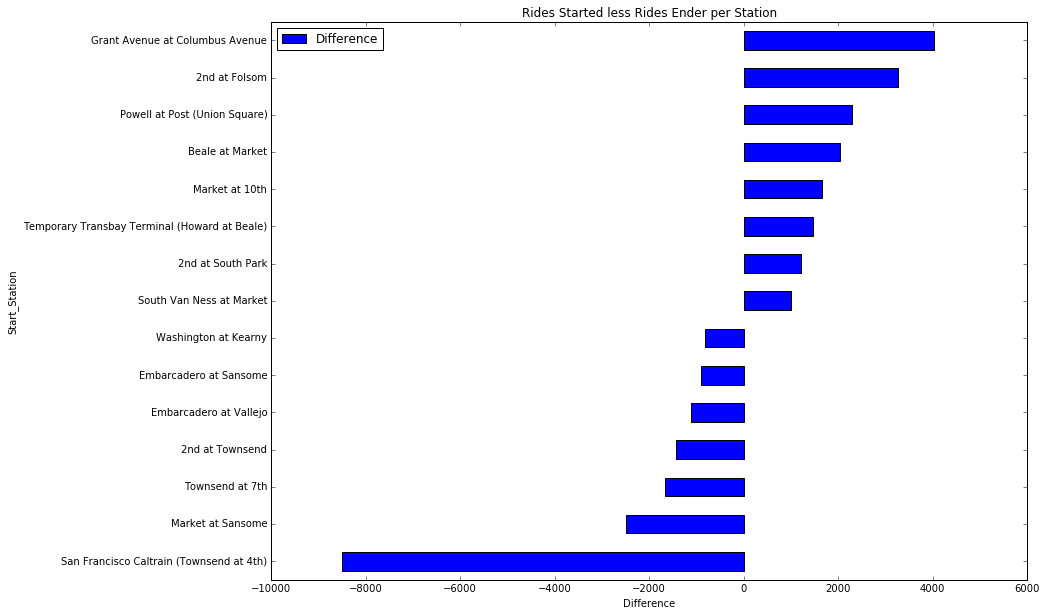

In [196]:
ax = diff.Trip_ID[diff.Trip_ID.abs() > 800].plot(kind='barh',figsize =(15,10), title = 'Rides Started less Rides Ender per Station',legend=True,label='Difference')
plt.gcf().subplots_adjust(left=0.20)
fig = ax.get_figure()
ax.set_xlabel("Difference")
fig.savefig('startstopdiff.png')

In [324]:
plt.barstatus_indexed.groupby(['station_id', 'bikes_available']).get_group((71, 0))['bikes_available'].count()
# status_indexed.groupby(['station_id', 'bikes_available']).get_group((62, 0))['bikes_available'].plot()
# status_indexed.groupby(['station_id', 'bikes_available']).get_group((73, 0))['bikes_available'].plot()
# status_indexed.groupby(['station_id', 'bikes_available']).get_group((62, 0)).count().plot(kind="bar")
# status_indexed.groupby(['station_id', 'bikes_available']).get_group((73, 0)).count().plot()

AttributeError: 'numpy.int64' object has no attribute 'plot'

In [349]:
# Finding Number of Instances (minutes) the stations with the greateast positive trip difference had zero bikes
# * 2nd at Folsom is Terminal 62
# * Grant Avenue at Columus is 73
# * Powel at Post is 71
# * Temporary Transbay Terminal (Howard at Beale) is 55
# * Market at 10th 67
# * Beale at Market 56

folsom = status_indexed.groupby(['station_id', 'bikes_available']).get_group((62, 0)).bikes_available.count()
grant = status_indexed.groupby(['station_id', 'bikes_available']).get_group((73, 0)).bikes_available.count()
powel = status_indexed.groupby(['station_id', 'bikes_available']).get_group((70, 0)).bikes_available.count()
transbay = status_indexed.groupby(['station_id', 'bikes_available']).get_group((55, 0)).bikes_available.count()
tenth = status_indexed.groupby(['station_id', 'bikes_available']).get_group((67, 0)).bikes_available.count()
beale = transbay = status_indexed.groupby(['station_id', 'bikes_available']).get_group((56, 0)).bikes_available.count()

In [350]:
# Finding Number of Instances (minutes) the stations with the greateast positive trip difference had zero bikes
# * Townsend at 7th is 65
# * San Francisco Caltrain (Townsend at 4th) is 70
# * Market at Sansome is 77
# * 2nd at Townsend is 61
# * Embarcadero at Vallejo is 48
# * Embarcadero at Sansone is 60


townsend = status_indexed.groupby(['station_id', 'bikes_available']).get_group((65, 0)).bikes_available.count()
caltrain = status_indexed.groupby(['station_id', 'bikes_available']).get_group((70, 0)).bikes_available.count()
market = status_indexed.groupby(['station_id', 'bikes_available']).get_group((77, 0)).bikes_available.count()
second = status_indexed.groupby(['station_id', 'bikes_available']).get_group((61, 0)).bikes_available.count()
vallejo = status_indexed.groupby(['station_id', 'bikes_available']).get_group((48, 0)).bikes_available.count()
sansone = status_indexed.groupby(['station_id', 'bikes_available']).get_group((60, 0)).bikes_available.count()


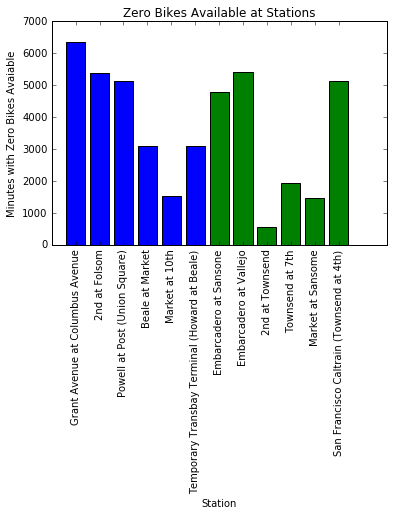

In [355]:
stations = [1,2,3,4,5,6,7,8,9,10,11,12]
no_bikes = [grant, folsom, powel, beale, tenth, transbay, sansone, vallejo, second, townsend, market, caltrain]

LABELS = ['Grant Avenue at Columbus Avenue', '2nd at Folsom', 'Powell at Post (Union Square)', 'Beale at Market', 'Market at 10th', 'Temporary Transbay Terminal (Howard at Beale)', 'Embarcadero at Sansone', 'Embarcadero at Vallejo', '2nd at Townsend' ,'Townsend at 7th', 'Market at Sansome','San Francisco Caltrain (Townsend at 4th)']
my_colors = ['b', 'b', 'b', 'b', 'b', 'b', 'g','g','g','g','g','g']
plt.bar(stations, no_bikes, align='center', color = my_colors)
plt.xticks(stations, LABELS, rotation=90)
plt.title('Zero Bikes Available at Stations')
plt.xlabel('Station')
plt.ylabel('Minutes with Zero Bikes Avaiable')
plt.show()


# ax = diff.Trip_ID[diff.Trip_ID.abs() > 800].plot(kind='barh',figsize =(15,10), title = 'Rides Started less Rides Ender per Station',legend=True,label='Difference')
# plt.gcf().subplots_adjust(left=0.20)
# fig = ax.get_figure()
# ax.set_xlabel("Difference")
# fig.savefig('startstopdiff.png')

In [290]:
status_indexed.groupby(['station_id', 'bikes_available']).get_group((62, 0)).bikes_available.count()

station_id         5385
bikes_available    5385
docks_available    5385
time               5385
dtype: int64

In [291]:
status_indexed.groupby(['station_id', 'bikes_available']).get_group((73, 0)).bikes_available.count()

station_id         6342
bikes_available    6342
docks_available    6342
time               6342
dtype: int64

In [329]:
status_indexed.groupby(['station_id', 'docks_available']).get_group((70, 0)).bikes_available.count()

7954

In [297]:
status_indexed.groupby('station_id').get_group[71].describe()

TypeError: 'method' object is not subscriptable

In [332]:
df.groupby(['Start_Station', 'Start_Terminal']).describe()
# .get_group(('San Pedro Square', 6))

Bike_#  \
Start_Station                                 Start_Terminal                       
2nd at Folsom                                 62             count   7999.000000   
                                                             mean     438.780098   
                                                             std      141.545653   
                                                             min       15.000000   
                                                             25%      350.000000   
                                                             50%      448.000000   
                                                             75%      548.000000   
                                                             max      878.000000   
2nd at South Park                             64             count   9469.000000   
                                                             mean     440.245538   
                                                             std      141.078884   
                                                             min       15.000000   
                                                             25%      351.000000   
                                                             50%      449.000000   
                                                             75%      548.000000   
                                                             max      878.000000   
2nd at Townsend                               61             count  14026.000000   
                                                             mean     439.822972   
                                                             std      139.117208   
                                                             min       16.000000   
                                                             25%      352.000000   
                                                             50%      448.000000   
                                                             75%      546.000000   
                                                             max      878.000000   
5th at Howard                                 57             count   7708.000000   
                                                             mean     438.106383   
                                                             std      141.287207   
                                                             min       15.000000   
                                                             25%      351.000000   
                                                             50%      449.000000   
                                                             75%      544.000000   
                                                             max      878.000000   
Adobe on Almaden                              5              count    562.000000   
                                                             mean     258.642349   
                                                             std      230.241248   
                                                             min        9.000000   
                                                             25%       88.250000   
                                                             50%      184.500000   
                                                             75%      301.000000   
                                                             max      716.000000   
Arena Green / SAP Center                      14             count    647.000000   
                                                             mean     259.913447   
                                                             std      233.740791   
                                                             min        9.000000   
                                                             25%       93.000000   
                                                             50%      178.000000   
                                          

* 2nd at Folsom is Terminal 62
* Grant Avenue at Columus is 73
* Powel at Post is 71

In [38]:
status = pd.read_csv('/Users/gochs/Documents/MIDS/Python_Bridge/Project_2/Data Sets/babs_open_data_year_1/201402_babs_open_data/201402_status_data.csv')

In [67]:
status_indexed = status.copy()
status_indexed.index = (range(len(status)))

In [68]:
status_indexed.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [369]:
results = []
for nums in range(len(status)):
    if (status_indexed.bikes_available[nums + 1] - status_indexed.bikes_available[nums]) > 4:
        results.append([str(status_indexed.station_id[nums+1]), str(status_indexed.bikes_available[nums]), str(status_indexed.bikes_available[nums+1]), str(status_indexed.time[nums+1])])
#         results.append(str(status_indexed.sation_id))

KeyboardInterrupt: 

In [ ]:
status.groupby

In [53]:
type(status.bikes_available[3])

numpy.int64

In [41]:
status.groupby('station_id').describe()

bikes_available  docks_available
station_id                                        
2          count    260491.000000    260491.000000
           mean         13.159291        13.817199
           std           3.675072         3.655776
           min           0.000000         3.000000
           25%          11.000000        11.000000
           50%          13.000000        14.000000
           75%          16.000000        16.000000
           max          24.000000        27.000000
3          count    260490.000000    260490.000000
           mean          7.971078         7.024404
           std           1.610098         1.609352
           min           0.000000         0.000000
           25%           7.000000         6.000000
           50%           8.000000         7.000000
           75%           9.000000         8.000000
           max          15.000000        15.000000
4          count    260490.000000    260490.000000
           mean          5.315655         5.641583
           std           1.565692         1.561619
           min           0.000000         0.000000
           25%           4.000000         5.000000
           50%           5.000000         6.000000
           75%           6.000000         7.000000
           max          11.000000        11.000000
5          count    260490.000000    260490.000000
           mean          9.268701         9.731283
           std           1.651357         1.651373
           min           0.000000         2.000000
           25%           8.000000         9.000000
           50%           9.000000        10.000000
...                           ...              ...
77         std           5.110411         4.778798
           min           0.000000         0.000000
           25%           7.000000         9.000000
           50%          11.000000        13.000000
           75%          15.000000        16.000000
           max          27.000000        27.000000
80         count     85482.000000     85482.000000
           mean          7.341440         7.657051
           std           1.213132         1.213723
           min           1.000000         5.000000
           25%           7.000000         7.000000
           50%           7.000000         8.000000
           75%           8.000000         8.000000
           max          10.000000        14.000000
82         count     54298.000000     54298.000000
           mean          6.138016         8.847471
           std           2.060630         2.062421
           min           0.000000         2.000000
           25%           5.000000         7.000000
           50%           6.000000         9.000000
           75%           8.000000        10.000000
           max          13.000000        15.000000
83         count     12216.000000     12216.000000
           mean          7.213818         7.785036
           std           1.066035         1.059796
           min           0.000000         6.000000
           25%           7.000000         7.000000
           50%           7.000000         8.000000
           75%           8.000000         8.000000
           max           9.000000        15.000000

[552 rows x 2 columns]

In [ ]:
def bike_difference(frame, new_frame):
    for i in range(1, len(frame)):
        if frame.station_id.loc[i] == frame.station_id.loc[i-1]:
            if (frame.bikes_available.loc[i] - frame.bikes_available.loc[i]).abs() > 4:
                new_frame[i] = frame[i]
        

In [42]:
for i in range(1, len(frame)) status:
    print(i)

station_id
bikes_available
docks_available
time


In [32]:
subscribers["date"] = subscribers["Start_Date"].map(pd.Timestamp.date)
customers["date"] = customers["Start_Date"].map(pd.Timestamp.date)

NameError: name 'subscribers' is not defined

In [ ]:
giants_13 = pd.read_csv('giants_14.csv')
# giants_13 = pd.read_csv(http://www.baseball-reference.com/teams/SFG/2013-schedule-scores.shtml#team_schedule::none)

giants_13.head(50)

In [206]:
giants_13.head(50)

,Rk,Gm#,Date,Tm,where,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,1,1,Monday Mar 31,SFG,@,ARI,W,9,8,NaN,1-0,1,Tied,Machi,Reed,Romo,3:25,N,48541,+
1,2,2,Tuesday Apr 1,SFG,@,ARI,L,4,5,NaN,1-1,2,1.0,Miley,Gutierrez,Reed,2:46,N,18974,-
2,3,3,Wednesday Apr 2,SFG,@,ARI,W,2,0,NaN,2-1,2,1.0,Hudson,Cahill,Romo,2:49,N,19357,+
3,4,4,Thursday Apr 3,SFG,@,ARI,W,8,5,NaN,3-1,2,0.5,Machi,Harris,NaN,3:11,D,19131,++
4,5,5,Friday Apr 4,SFG,@,LAD,W,8,4,NaN,4-1,1,up 0.5,Huff,Ryu,NaN,3:25,D,53493,+++
5,6,6,Saturday Apr 5,SFG,@,LAD,W,7,2,NaN,5-1,1,up 1.5,Bumgarner,Maholm,NaN,3:42,D,49520,++++
6,7,7,Sunday Apr 6,SFG,@,LAD,L,2,6,NaN,5-2,1,up 0.5,Greinke,Cain,NaN,2:51,N,48367,-
7,8,8,Tuesday Apr 8,SFG,NaN,ARI,W,7,3,NaN,6-2,1,up 0.5,Hudson,Cahill,NaN,2:39,D,42166,+
8,9,9,Wednesday Apr 9,SFG,NaN,ARI,L,3,7,NaN,6-3,1,up 0.5,Arroyo,Lincecum,Collmenter,2:52,N,41157,-
9,10,10,Thursday Apr 10,SFG,NaN,ARI,L,5,6,10,6-4,1,Tied,Putz,Petit,Reed,4:10,N,41577,--


In [221]:
park_fmt = giants_13.where[1]

def get_home(park):
    if park is np.nan:
        return 1 # if it's NaN, leave it
print(get_home(park_fmt))

TypeError: 'method' object is not subscriptable

In [225]:
giants_13 = giants_13.fillna(1)
giants_13

,Rk,Gm#,Date,Tm,where,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,1,1,Monday Mar 31,SFG,@,ARI,W,9,8,1,1-0,1,Tied,Machi,Reed,Romo,3:25,N,48541,+
1,2,2,Tuesday Apr 1,SFG,@,ARI,L,4,5,1,1-1,2,1.0,Miley,Gutierrez,Reed,2:46,N,18974,-
2,3,3,Wednesday Apr 2,SFG,@,ARI,W,2,0,1,2-1,2,1.0,Hudson,Cahill,Romo,2:49,N,19357,+
3,4,4,Thursday Apr 3,SFG,@,ARI,W,8,5,1,3-1,2,0.5,Machi,Harris,1,3:11,D,19131,++
4,5,5,Friday Apr 4,SFG,@,LAD,W,8,4,1,4-1,1,up 0.5,Huff,Ryu,1,3:25,D,53493,+++
5,6,6,Saturday Apr 5,SFG,@,LAD,W,7,2,1,5-1,1,up 1.5,Bumgarner,Maholm,1,3:42,D,49520,++++
6,7,7,Sunday Apr 6,SFG,@,LAD,L,2,6,1,5-2,1,up 0.5,Greinke,Cain,1,2:51,N,48367,-
7,8,8,Tuesday Apr 8,SFG,1,ARI,W,7,3,1,6-2,1,up 0.5,Hudson,Cahill,1,2:39,D,42166,+
8,9,9,Wednesday Apr 9,SFG,1,ARI,L,3,7,1,6-3,1,up 0.5,Arroyo,Lincecum,Collmenter,2:52,N,41157,-
9,10,10,Thursday Apr 10,SFG,1,ARI,L,5,6,10,6-4,1,Tied,Putz,Petit,Reed,4:10,N,41577,--


In [234]:
home_games = giants_13.groupby('where').get_group(1)['Date']
home_games

7         Tuesday Apr 8
8       Wednesday Apr 9
9       Thursday Apr 10
10        Friday Apr 11
11      Saturday Apr 12
12        Sunday Apr 13
13       Tuesday Apr 15
14     Wednesday Apr 16
15      Thursday Apr 17
22        Friday Apr 25
23      Saturday Apr 26
24        Sunday Apr 27
25        Monday Apr 28
26       Tuesday Apr 29
27     Wednesday Apr 30
38        Monday May 12
39       Tuesday May 13
40     Wednesday May 14
41      Thursday May 15
42        Friday May 16
43      Saturday May 17
44        Sunday May 18
48        Friday May 23
49      Saturday May 24
50                 Date
51        Sunday May 25
52        Monday May 26
53       Tuesday May 27
54     Wednesday May 28
62         Friday Jun 6
             ...       
105       Friday Jul 25
106     Saturday Jul 26
107       Sunday Jul 27
108       Monday Jul 28
109      Tuesday Jul 29
110    Wednesday Jul 30
121      Tuesday Aug 12
122    Wednesday Aug 13
123       Friday Aug 15
124     Saturday Aug 16
125       Sunday

In [205]:
giants_13.rename(columns={giants_13.columns[4]:'where'}, inplace=True)

In [237]:
homegames = pd.DataFrame(home_games)

In [241]:
homegames

,Date
7,Tuesday Apr 8
8,Wednesday Apr 9
9,Thursday Apr 10
10,Friday Apr 11
11,Saturday Apr 12
12,Sunday Apr 13
13,Tuesday Apr 15
14,Wednesday Apr 16
15,Thursday Apr 17
22,Friday Apr 25


In [217]:
giants_13.groupby('where').describe()


Attendance D/N           Date   GB Gm# Inn    Loss  Opp   R  RA  \
where                                                                          
@     count          81  81             81   81  81   7      81   81  81  81   
      unique         80   2             81   23  81   4      51   18  13  12   
      top         36067   N  Monday Jul 21  2.0  17  10  Hudson  LAD   2   4   
      freq            2  51              1   10   1   3       8   10  16  13   

             Rank  Rk  Save Streak  Time   Tm    W-L W/L        Win  
where                                                                
@     count    81  81    46     81    81   81     81  81         81  
      unique    3  81    20     12    58    1     81   4         46  
      top       2  17  Romo      -  2:49  SFG  60-51   W  Bumgarner  
      freq     41   1    12     21     4   81      1  43         11

In [33]:
pd.to_datetime(giants_13['Date', None])


KeyError: ('Date', None)

## BRIANS WORK TO GET DAYS OF WEEK

In [244]:
subscribers = df[df['Subscriber_Type'] == 'Subscriber']
customers = df[df['Subscriber_Type'] == 'Customer']


In [246]:
a = subscribers.Start_Date.map(lambda x: x.strftime("%A"))
b = customers.Start_Date.map(lambda x: x.strftime("%A"))

In [255]:
subscribers['Day_of_week'] = subscribers.Start_Date.map(lambda x: x.strftime("%A"))
customers['Day_of_week'] = customers.Start_Date.map(lambda x: x.strftime("%A"))


In [256]:
subscribers['Day_of_week'] = pd.Categorical(subscribers.Day_of_week, categories=["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
customers['Day_of_week'] = pd.Categorical(customers.Day_of_week, categories=["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [257]:
subscribers["hour"] = subscribers["Start_Date"].map(lambda x: x.hour)
customers["hour"] = customers["Start_Date"].map(lambda x: x.hour)

In [262]:
subscribers["date"] = subscribers["Start_Date"].map(pd.Timestamp.date)
customers["date"] = customers["Start_Date"].map(pd.Timestamp.date)


In [328]:
subscribers_3 = subscribers.join(home_games, how='outer')
subscribers_3

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code,Day_of_week,-1,hour,date,Date
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,2015-08-31 23:39:00,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,Monday,NaN,23,2015-08-31,NaN
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,2015-08-31 23:28:00,Mountain View City Hall,27,35,Subscriber,95032,Monday,NaN,23,2015-08-31,NaN
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,2015-08-31 23:18:00,2nd at South Park,64,468,Subscriber,94107,Monday,NaN,23,2015-08-31,NaN
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,2015-08-31 23:17:00,San Salvador at 1st,8,68,Subscriber,95113,Monday,NaN,23,2015-08-31,NaN
5,913452,293,2015-08-31 23:07:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2015-08-31 23:12:00,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118,Monday,NaN,23,2015-08-31,NaN
7,913450,255,2015-08-31 22:16:00,Embarcadero at Sansome,60,2015-08-31 22:20:00,Steuart at Market,74,470,Subscriber,94111,Monday,NaN,22,2015-08-31,Tuesday Apr 8
8,913449,126,2015-08-31 22:12:00,Beale at Market,56,2015-08-31 22:15:00,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130,Monday,NaN,22,2015-08-31,Wednesday Apr 9
9,913448,932,2015-08-31 21:57:00,Post at Kearny,47,2015-08-31 22:12:00,South Van Ness at Market,66,472,Subscriber,94702,Monday,NaN,21,2015-08-31,Thursday Apr 10
10,913443,691,2015-08-31 21:49:00,Embarcadero at Sansome,60,2015-08-31 22:01:00,Market at Sansome,77,434,Subscriber,94109,Monday,NaN,21,2015-08-31,Friday Apr 11
11,913442,633,2015-08-31 21:44:00,Market at 10th,67,2015-08-31 21:54:00,San Francisco Caltrain (Townsend at 4th),70,531,Subscriber,94107,Monday,NaN,21,2015-08-31,Saturday Apr 12
